In [2]:
%load_ext autoreload
%autoreload 2
%reset -f


import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from stats import *
import sys
from scipy.signal import savgol_filter

%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

import ok


In [3]:
reso = "low"

grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'
f_input_save =  '/gpfsscratch/rech/psl/upu87pm/preprocessed_data/scoring_input.npy'
f_target_save = ['../data/npy_data/prediction/target_'+str(i)+'.npy' for i in range(73)]
f_save = ['../data/npy_data/prediction/prediction_'+str(i)+'.npy' for i in range(73)]
unscale = '../../ClimSim/preprocessing/normalizations/outputs/output_scale.nc'

print(grid_b)

var = 'cam_out_PRECC'

../data/nc_data/grid_with_boundaries_lowres.nc


In [4]:
grid = xr.open_dataset(grid_b)

In [5]:
dp, area = compute_dp(grid)

In [9]:
D = compute_stats(f_target_save[:5], f_save[:5], unscale = unscale)#, conv = (dp, area))

stats computed on 300 time steps


In [10]:
print(D['r2_ncol'].shape)

(384, 60)


Text(0.5, 1.0, 'r2')

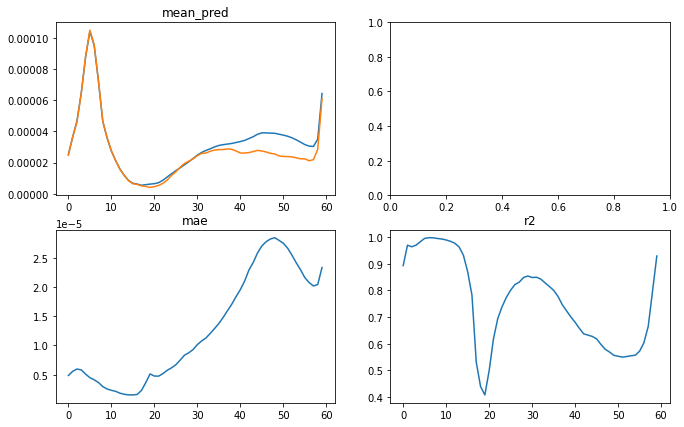

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fccc1419150>>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3765, in atexit_operations
    self._atexit_once()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3748, in _atexit_once
    self.history_manager.end_session()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/history.py", line 604, in end_session
    self.db.execute("""UPDATE sessions SET end=?, num_cmds=? WHERE
sqlite3.OperationalError: disk I/O error


In [11]:
fig, axs = plt.subplots(2, 2, figsize=(11, 7))
axs[0,0].plot(range(60), D['mean_true'])
axs[0,0].set_title("mean_true")
axs[0,0].plot(range(60), D['mean_pred'])
axs[0,0].set_title("mean_pred")
axs[1,0].plot(range(60), D['mae'])
axs[1,0].set_title("mae")
axs[1,1].plot(range(60), D['r2'])
axs[1,1].set_title("r2")

In [58]:
mean = npy_toxarray(D['r2_ncol'], grid_b, var = 'stat')

numpy array
time counter =  1


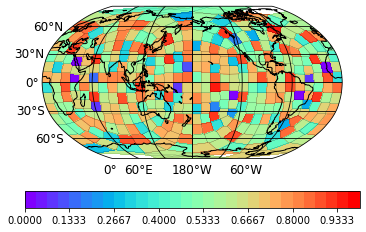

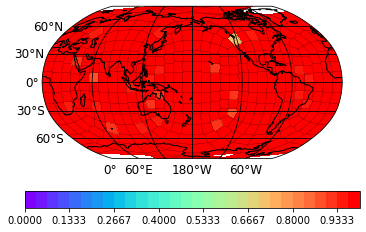

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f67cafc9150>>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3765, in atexit_operations
    self._atexit_once()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3748, in _atexit_once
    self.history_manager.end_session()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/IPython/core/history.py", line 602, in end_session
    self.writeout_cache()
  File "/gpfslocalsup/pub/anaconda-py3/2021.05/envs/tensorflow-2.9.1+py3.10/lib/python3.10/site-packages/decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "/gpfslocalsup/pub/anaconda-py3/

In [59]:
var = 'stat'
lev = 21
nc = 31
time_counter = 0

inf = (mean[var].min())
sup = (mean[var].max())
L = max(abs(inf), abs(sup))

map_out = mean.psy.plot.mapplot(name=var, lev = lev, time_counter = time_counter, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(0, 1, nc))
map_out = mean.psy.plot.mapplot(name=var, lev = 10, time_counter = time_counter, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin', bounds = np.linspace(0, 1, nc))
